# Basic example of an event study with the sanpy module

In [1]:
from datetime import date
import numpy as np
import san

from san.extras.event_study import event_study, signals_format, hypothesis_test

### Collecting data:

In [2]:
data = san.get("ohlcv/bitcoin")
data["bitcoin"] = data.closePriceUsd
data["ETH_close"] = san.get("ohlcv/ethereum").closePriceUsd
data["daily_active_addresses_ETH"] = san.get("daily_active_addresses/ethereum")

data["daa_performance"] = np.log(data["daily_active_addresses_ETH"].pct_change() + 1)
data["sd_rolling"] = data["daa_performance"].rolling(100).std()

price = data[["ETH_close", "bitcoin"]]
price=price.tz_convert(None)  # Event Study needs date instead of datetime

### Defining the signal:

In [3]:
# Defining signals:
# Buy Signal: Is the current trend lower than two standard deviations?
data["buy"] = (data["daa_performance"] < (data["sd_rolling"] * (-1) * 2))
# Sell Signal: Is the current trend higher than two standard deviations?
data["sell"] = (data["daa_performance"] > (data["sd_rolling"] * 2))

### Using the helper function to get the signals in the right format and executing the event study:

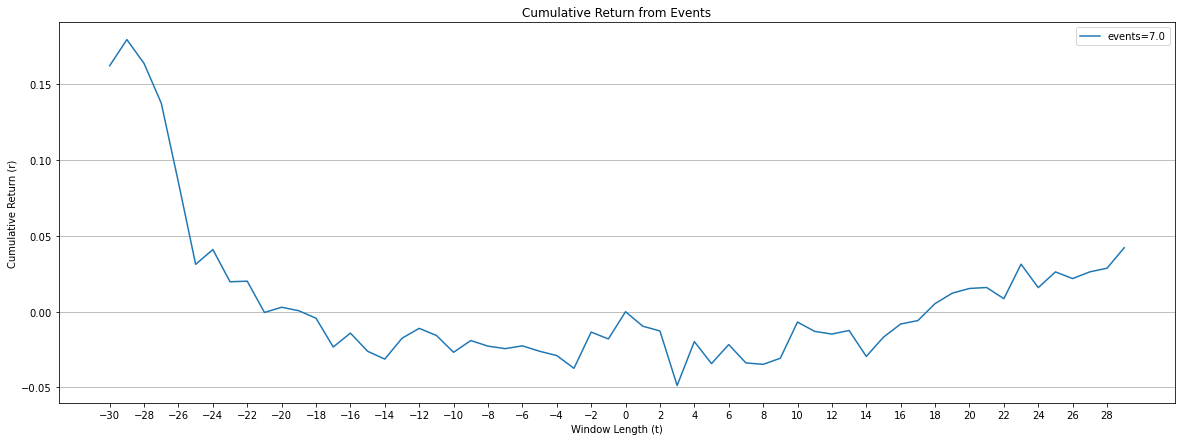

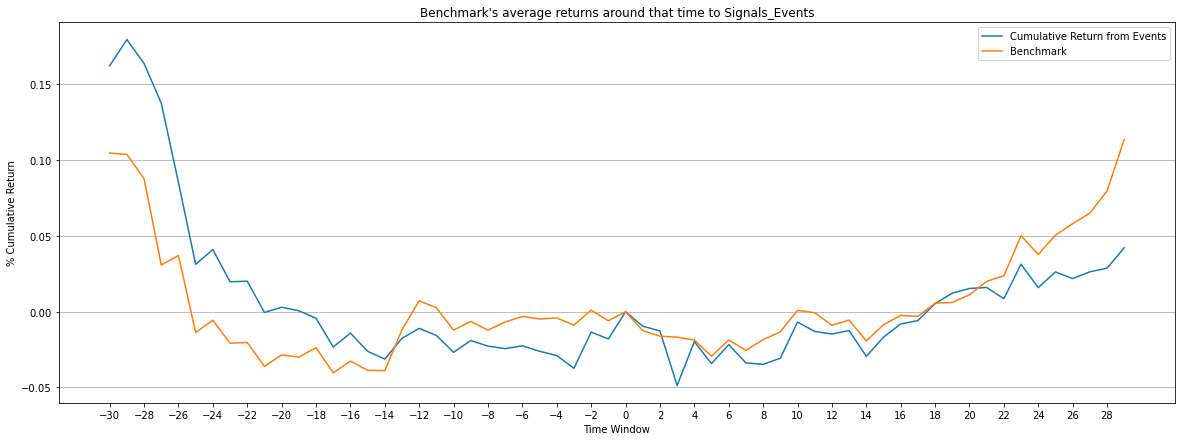

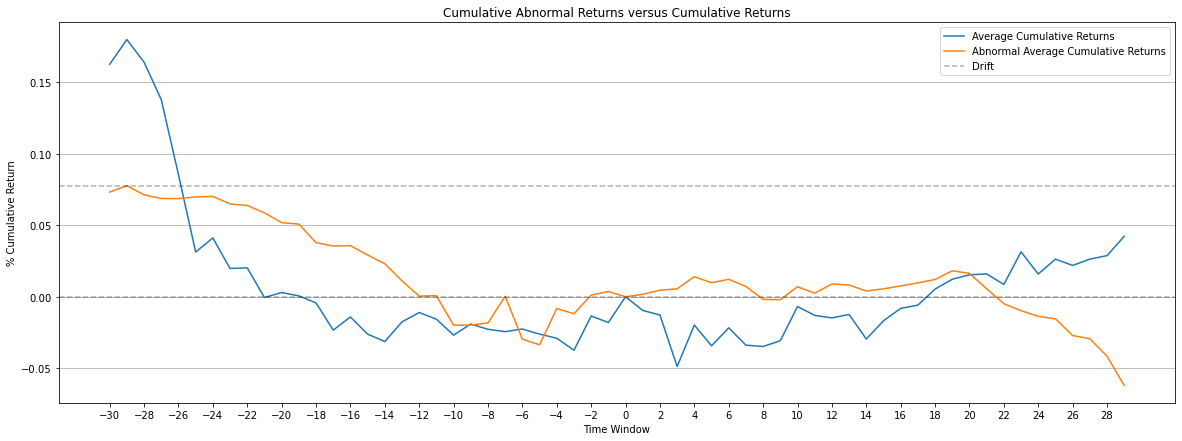

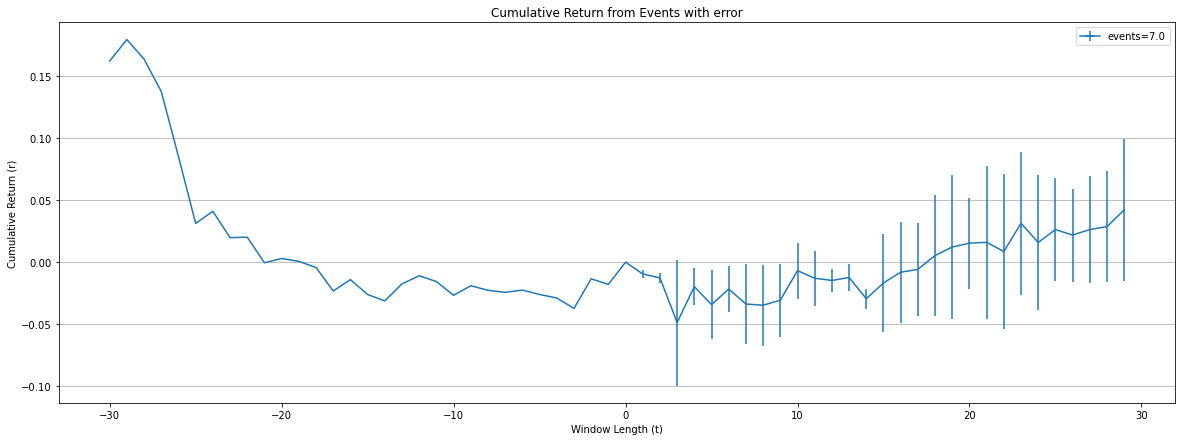

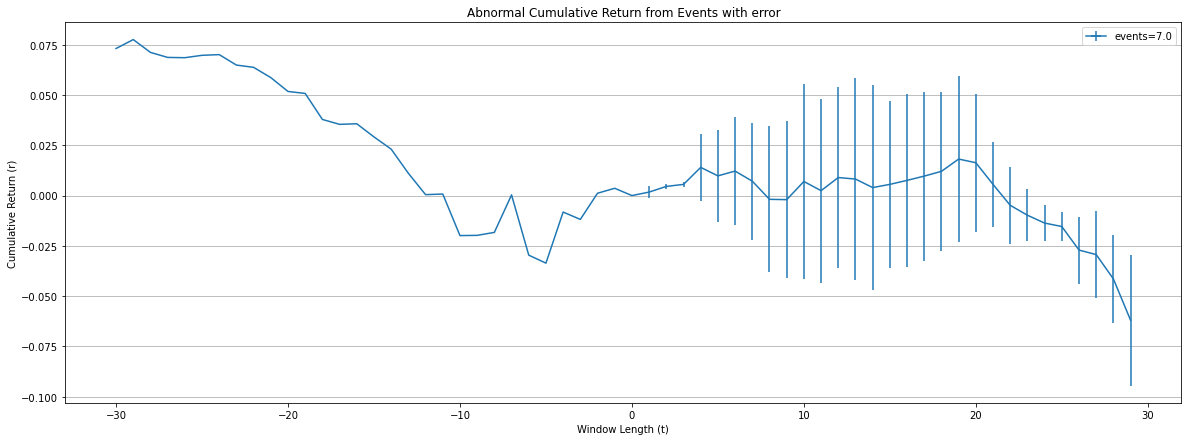

In [4]:
# Helper function to get the signals in the right format:
signals = signals_format(data["sell"],'ETH_close')

# Calling the event study:
event_study(price, signals, starting_point = 30)

### Checking how significant the signals are with the hypothesis test function:

,AAR,t-AAR,P-Value t-AAR,CAAR,t-CAAR,P-Value t-CAAR
-30,-0.001447,-0.037764,0.484938,-0.001447,-0.037764,0.484938
-29,-0.002394,-0.091806,0.463426,-0.003841,-0.076888,0.469356
-28,0.007630,0.351902,0.637544,0.003788,0.102874,0.540969
-27,-0.001203,-0.098603,0.460727,0.002586,0.092718,0.536936
-26,0.004706,0.211145,0.583613,0.007292,0.183786,0.572909
...,...,...,...,...,...,...
26,-0.011863,-0.592828,0.276648,0.006602,0.037216,0.514844
27,-0.002023,-0.167789,0.433375,0.004580,0.025078,0.510004
28,-0.009263,-0.490605,0.311853,-0.004684,-0.026540,0.489413
29,-0.019201,-0.875888,0.190545,-0.023884,-0.139780,0.444417


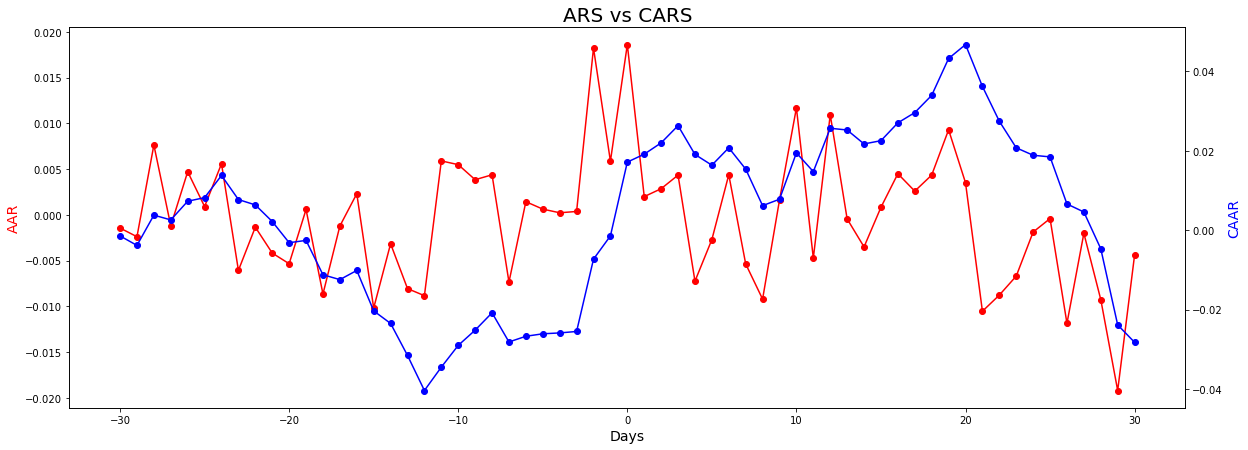

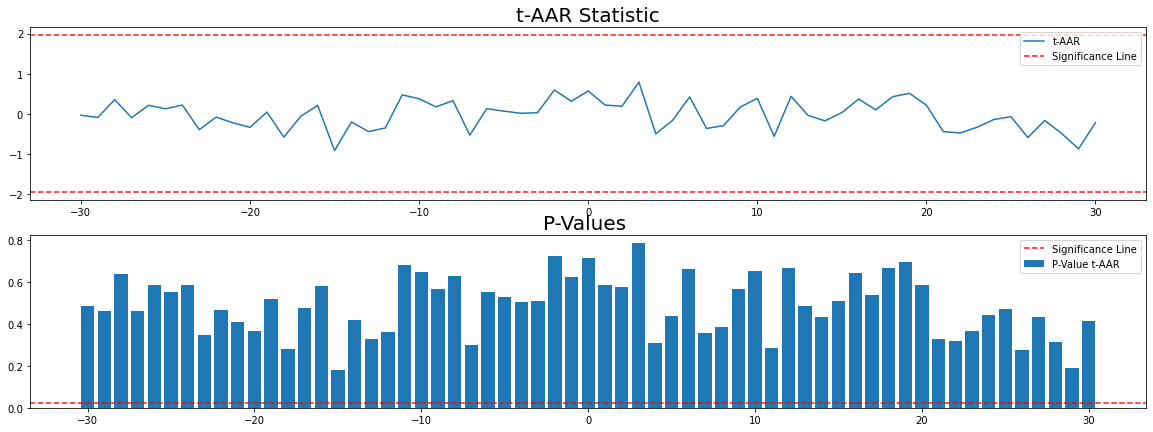

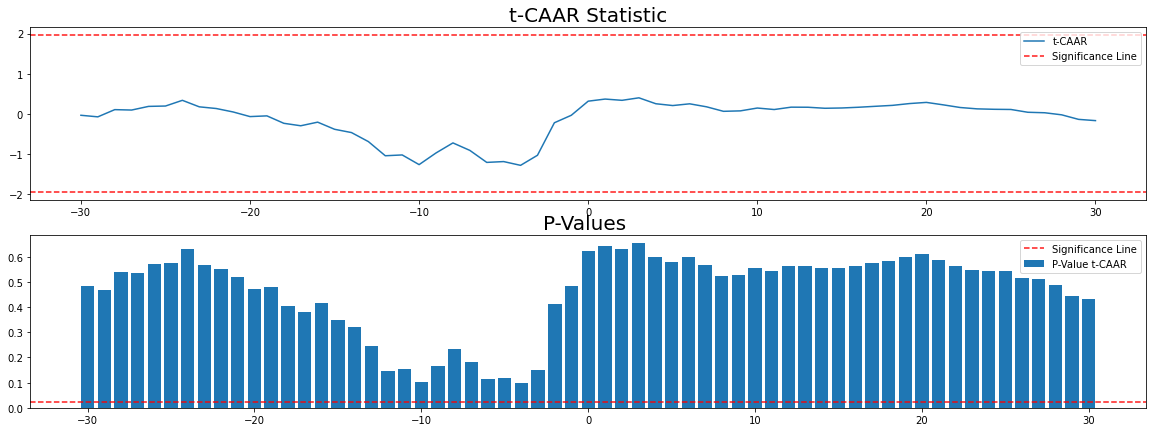

In [5]:
# Calling the hypothesis test:
hypothesis_test(price, signals, starting_point = 30,benchmark='bitcoin',intercept=True,CI=.95)